In [16]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
from keras import backend as K
K.set_image_dim_ordering('th')

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
from generators.generators import SimpleImageGenerator
import numpy as np

In [19]:
# define data preparation
datagen = SimpleImageGenerator(crop_size=(20,20), random_crop=True)
train_data_iterator = datagen.flow_from_list(X_train, y_train, batch_size=9)

In [20]:
out = train_data_iterator._get_batches_of_transformed_samples(np.arange(X_train.shape[0]))

In [21]:
out.shape

(60000, 3, 20, 20)

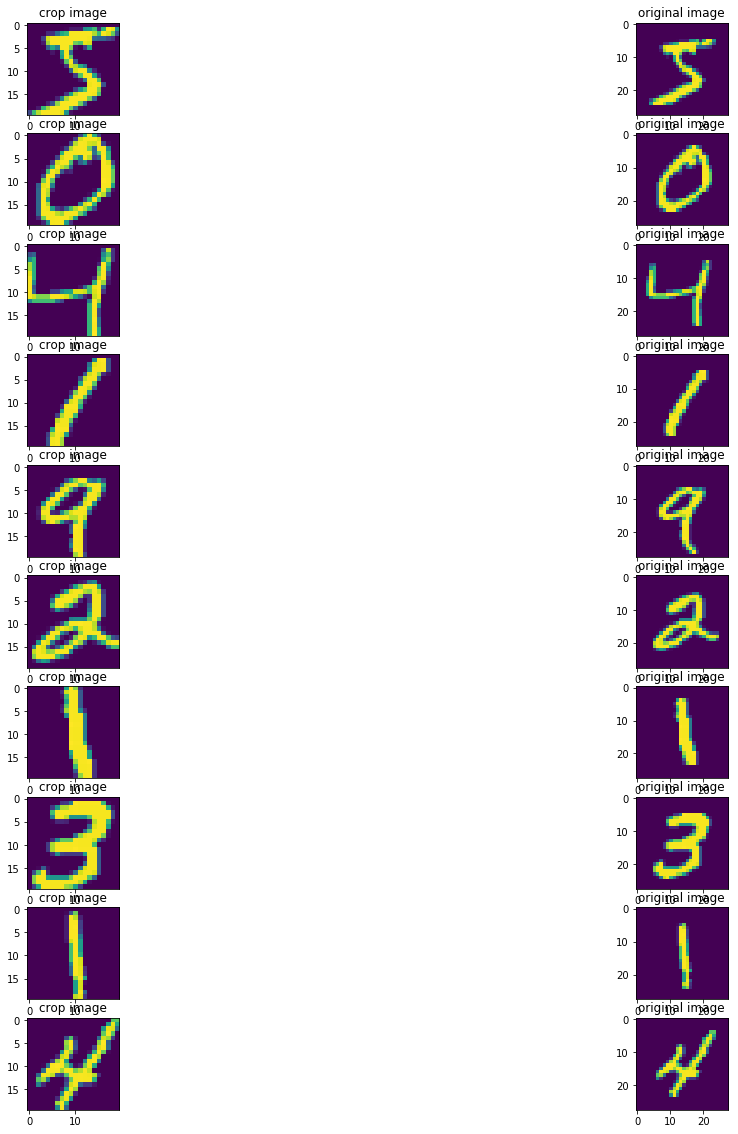

In [22]:
from matplotlib import pyplot as plt
n = 10
fig, axes = plt.subplots(n, 2, figsize=(20,20))

for image, originalImage, ax in zip(out[:n,0], X_train[:n], axes):
    ax[0].imshow(image)
    ax[0].set_title('crop image')
    ax[1].imshow(originalImage)
    ax[1].set_title('original image')

In [16]:
import numpy as np
import sys
sys.path.append('..')
from ModisUtils.misc import *

In [17]:
(train_data, train_target) = get_data('train', timeSteps=7)

Restore train from cache!


In [18]:
train_data.shape

(144, 7, 40, 40, 1)

In [19]:
#scaler = MinMaxScaler()
#scaler.fit(train_data.reshape(train_data.shape[0]*\
#                          train_data.shape[1]*train_data.shape[2],
#                          train_data.shape[3]*train_data.shape[4]))
#train_data = scaleAsTrain(train_data, scaler)
#train_target = scaleAsTrain(train_target, scaler)

In [20]:
train_target.shape

(144, 40, 40, 1)

In [21]:
train_target_1 = train_target.reshape(train_target.shape[0], 1, train_target.shape[1], 
                                      train_target.shape[2], train_target.shape[3])
train_target_1.shape

(144, 1, 40, 40, 1)

In [22]:
train_data_1 = np.concatenate([train_data, train_target_1], axis=1)

In [23]:
train_data_1 = train_data_1.squeeze(axis=-1)

In [24]:
# define data preparation
from generators.generators import SimpleImageGenerator
datagen = SimpleImageGenerator(crop_size=(10,10), random_crop=True, rotation_offset=(0,1))
train_data_iterator = datagen.flow_from_list(x=train_data_1, nframes=train_data_1.shape[1])

In [25]:
train_data_iterator.x.shape

(144, 8, 40, 40)

In [26]:
train_data_crop = train_data_iterator._get_batches_of_transformed_samples(np.arange(train_data.shape[0]))

In [27]:
train_data_crop.shape

(144, 8, 10, 10)

Text(0.5,1,'original groundtruth')

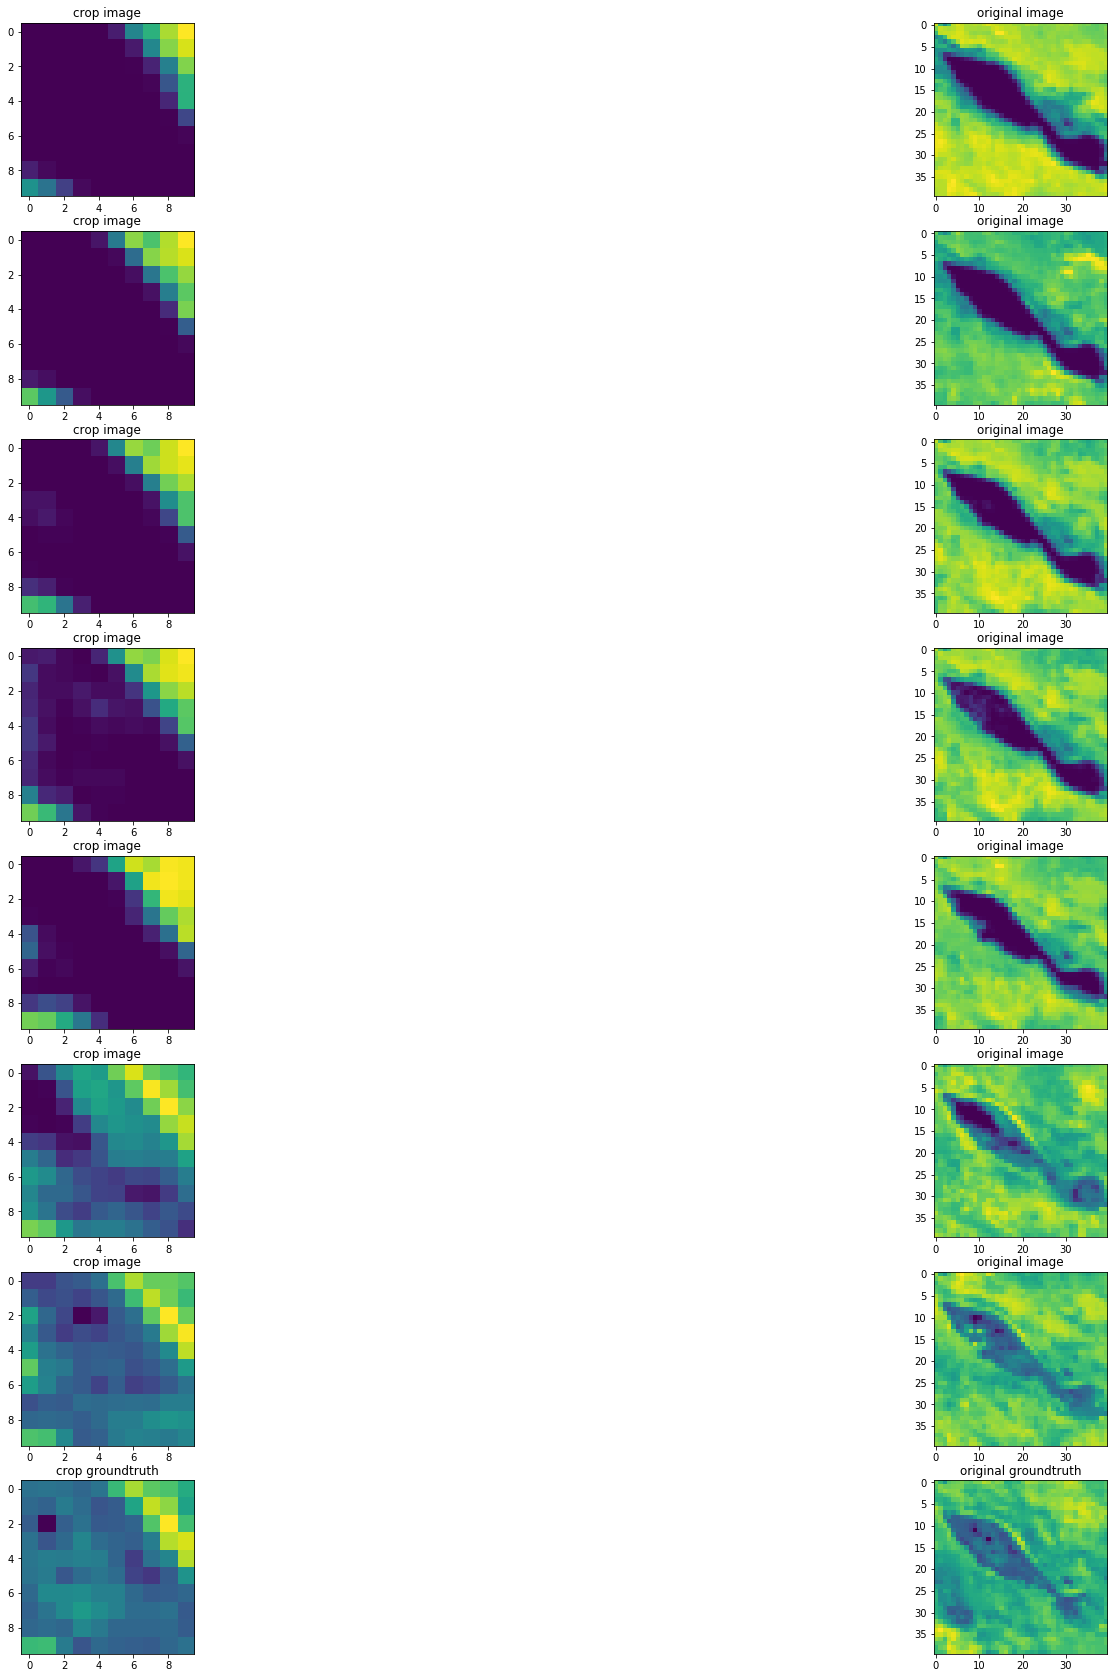

In [32]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(train_data_1.shape[1], 2, figsize=(30,30))
for crop_image, original_image, ax in zip(train_data_crop[0][:-1], train_data[0].squeeze(axis=-1), axes[:-1]):
    ax[0].imshow(crop_image)
    ax[0].set_title('crop image')
    ax[1].imshow(original_image)
    ax[1].set_title('original image')
axes[-1][0].imshow(train_data_crop[0][-1])
axes[-1][0].set_title('crop groundtruth')
axes[-1][1].imshow(train_target[0].squeeze(axis=-1))
axes[-1][1].set_title('original groundtruth')